## Sorption behaviour and transport processes

In [ ]:
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc as erfc

import math

# Isotherms

### Linear isotherms

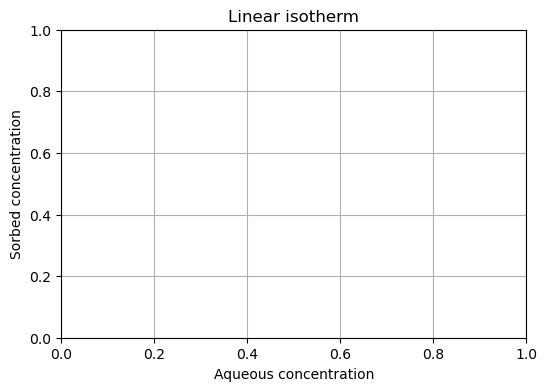

interactive(children=(FloatSlider(value=0.5, description='Kd', max=1.0, min=0.01, step=0.01), Output()), _dom_…

In [3]:
# set up plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.grid(True)
ax.set_xlabel('Aqueous concentration')
ax.set_ylabel('Sorbed concentration')
ax.set_title('Linear isotherm')
 
# We will use numpy to build vector arrays to plot different isotherms. First define aqueous phase solute concentration
C = np.linspace(0, 1, 100)

def linear_isotherm(C, Kd):
    """
    Return an isotherm with a slope equal to Kd
    """
    return Kd*C
 
@widgets.interact(Kd=(0.01, 1, 0.01))
def update(Kd = 0.5):
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax.lines]
    ax.plot(C, linear_isotherm(C, Kd), color='k')

### Langmuir isotherm

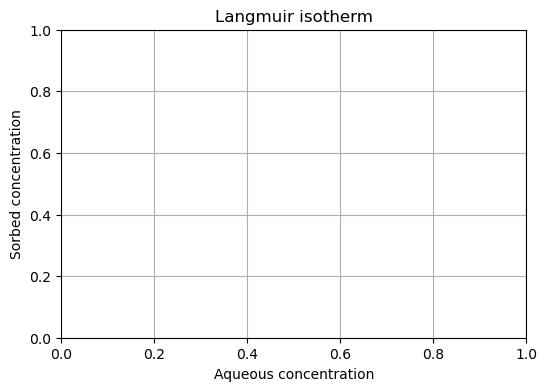

interactive(children=(FloatSlider(value=1.0, description='alpha', max=20.0), FloatSlider(value=1.0, descriptio…

In [6]:
#https://github.com/zahasky/Contaminant-Hydrogeology-Activities/blob/master/Sorption%20Isotherms.ipynb

# set up plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.grid(True)
ax.set_xlabel('Aqueous concentration')
ax.set_ylabel('Sorbed concentration')
ax.set_title('Langmuir isotherm')

# Function to return a langmuir isotherm
def langmuir_isotherm(C, alpha, beta):
    return alpha*beta*C/(1+ alpha*C)
 
# Make interactive plot
@widgets.interact(alpha=(0, 20, 0.1), beta=(0.1, 2, 0.1))
def update(alpha = 1.0, beta = 1.0):
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax.lines]
    ax.plot(C, langmuir_isotherm(C, alpha, beta), color='k')

## Relative permeability

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
import ipywidgets as widgets

### Brooks-Corey relative permeability function

In [8]:
# Brooks-Corey function
def brooks_corey_rel_perm_fun(Sw, Swr, Snwr, krw0, krnw0, m):
    # Now calculate the effective saturation (think of this as normalized saturation (ranges from 0-1))
    Se = (Sw - Swr)/((1 - Snwr) - Swr)
    # Water relative permeability
    krw = krw0*Se**(2/m + 3)
    # Nonwetting phase relative permeability
    krnw = krnw0*(1-Se)**2*(1-Se**(2/m + 1))
    return krw, krnw

In [9]:
# Modified Brooks-Corey function
def mod_brooks_corey_rel_perm_fun(Sw, Swr, Snwr, krw0, krnw0, nw, nnw):
    # Now calculate the effective saturation (think of this as normalized saturation (ranges from 0-1))
    Se = (Sw - Swr)/((1 - Snwr) - Swr)
    # Water relative permeability
    krw = krw0*Se**nw
    # Nonwetting phase relative permeability
    krnw = krnw0*(1-Se)**nnw
    return krw, krnw

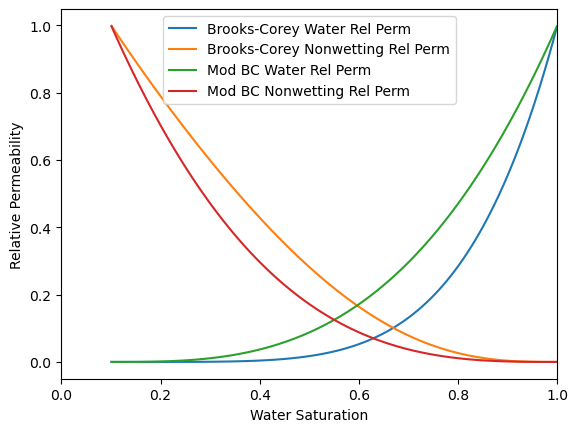

In [10]:
# Define residual water saturation (the residual water after drainage)
Swr = 0.1
# Define the residual gas saturation (defined as the water saturation after imbibition)
Snwr = 0
# define variable 'Sw' to describe water saturation
Sw = np.linspace((Swr + 0.001), (1 - Snwr - 0.001), num=100)

# End point relative permeability. 
# Water end point relative permeability, this is equal to the relative permeabiltiy at the residual gas saturation
krw0 = 1
# Nonwetting phase end point relative permeability
krnw0 = 1

# Call Brooks-Corey function
krw_bc, krnw_bc = brooks_corey_rel_perm_fun(Sw, Swr, Snwr, krw0, krnw0, 1)
# Call modified Brooks-Corey function
krw_mbc, krnw_mbc = mod_brooks_corey_rel_perm_fun(Sw, Swr, Snwr, krw0, krnw0, 3, 3)

# Plot the results
plt.plot(Sw, krw_bc, label='Brooks-Corey Water Rel Perm')
plt.plot(Sw, krnw_bc, label='Brooks-Corey Nonwetting Rel Perm')

plt.plot(Sw, krw_mbc, label='Mod BC Water Rel Perm')
plt.plot(Sw, krnw_mbc, label='Mod BC Nonwetting Rel Perm')

plt.xlabel('Water Saturation')
plt.ylabel('Relative Permeability')
plt.legend()
plt.xlim(0, 1)
plt.show()

### Burdine's Method to calculate relative permeability from a capillary pressure curve

In [11]:
# Brooks-Corey capillary pressure function 
def brooks_corey_pc(Sw, Swr, Snwr, Pc_entry, m):
    # Now calculate the effective saturation (think of this as normalized saturation (ranges from 0-1))
    Se = (Sw - Swr)/((1 - Snwr) - Swr)
    Pc = Pc_entry*(Se**(-1/m))
    return Pc

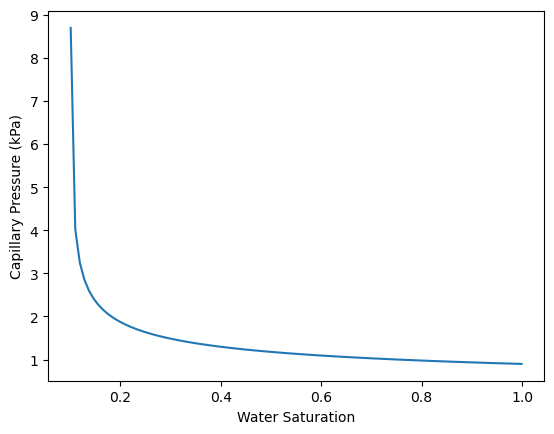

In [12]:
# Define residual water saturation (the residual water after drainage)
Swr = 0.1
# Define the residual gas saturation (defined as the water saturation after imbibition)
Snwr = 0
# define variable 'Sw' to describe water saturation
Sw = np.linspace((Swr + 0.001), (1 - Snwr - 0.001), num=100)

m_bc = 3
Pc_entry_bc = 0.9
Pc_bc = brooks_corey_pc(Sw, Swr, Snwr, Pc_entry_bc, m_bc)

plt.plot(Sw, Pc_bc)
plt.xlabel('Water Saturation')
plt.ylabel('Capillary Pressure (kPa)')
plt.show()

### Illustration of Burdine's method

In [15]:
# Denominator (constant)
from scipy.integrate import trapz
denom = trapz(1 / Pc_bc**2, Sw)


# Interactive function
def update(i):
    Sw_val = Sw[i]
    Se_val = (Sw_val - Swr)/((1 - Snwr) - Swr)
    
    kw_numer = 1 / Pc_bc[:i]**2
    knw_numer = 1 / Pc_bc[i:]**2

    krw_integrand = Se_val**2 * trapz(kw_numer, Sw[:i])
    krw_val = krw_integrand / denom

    knrw_integrand = (1 - Se_val)**2 * trapz(knw_numer, Sw[i:])
    knrw_val = knrw_integrand / denom
    
    fig, axs = plt.subplots(1, 3, figsize=(9, 3.5))
    fig.suptitle(f"Burdine Relative Permeability at $S_w = {Sw_val:.2f}$", fontsize=14)
    
    # Plot 1: Denominator
    axs[0].plot(Sw, 1 / Pc_bc**2, label=f'area = {denom:.2f}', color='blue')
    axs[0].fill_between(Sw, 1 / Pc_bc**2, color='blue', alpha=0.3)
    axs[0].set_title("Denominator")
    axs[0].set_xlabel("Sw")
    axs[0].set_ylabel(r'$1/P_c^2$')
    axs[0].set_xlim([0, 1])
    axs[0].legend()
    
    # Plot 2: krw integrand
    axs[1].plot(Sw[:i], kw_numer, label=f'area = {krw_integrand:.3f}', color='green')
    axs[1].fill_between(Sw[:i], kw_numer, color='green', alpha=0.3)
    axs[1].set_title(f"Integrand for $k_{{rw}}$\n$k_{{rw}} = {krw_val:.3f}$")
    axs[1].set_xlabel("Sw")
    axs[1].set_ylabel(r'$1/P_c^2$')
    axs[1].set_xlim([0, 1])
    axs[1].legend()
    
    # Plot 3: knrw integrand
    axs[2].plot(Sw[i:], knw_numer, label=f'area = {knrw_integrand:.3f}', color='red')
    axs[2].fill_between(Sw[i:], knw_numer, color='red', alpha=0.3)
    axs[2].set_title(f"Integrand for $k_{{nrw}}$\n$k_{{nrw}} = {knrw_val:.3f}$")
    axs[2].set_xlabel("Sw")
    axs[2].set_ylabel(r'$1/P_c^2$')
    axs[2].set_xlim([0, 1])
    axs[2].legend()
    
    plt.tight_layout()
    plt.show()

# Create slider
slider = IntSlider(min=5, max=len(Sw) - 5, step=1, value=50, description='Sw index')

# Display interactive widget
interact(update, i=slider)

C:\Users\venka\AppData\Local\Temp\ipykernel_17424\2042011278.py:3: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  denom = trapz(1 / Pc_bc**2, Sw)


interactive(children=(IntSlider(value=50, description='Sw index', max=95, min=5), Output()), _dom_classes=('wi…

<function __main__.update(i)>

C:\Users\venka\AppData\Local\Temp\ipykernel_17424\2084022423.py:8: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  denom = trapz(1 / Pc_bc**2, Sw)
C:\Users\venka\AppData\Local\Temp\ipykernel_17424\2084022423.py:14: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  krw_integrand = Se_val**2 * trapz(kw_numer, Sw[:i])
C:\Users\venka\AppData\Local\Temp\ipykernel_17424\2084022423.py:17: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  knrw_integrand = (1 - Se_val)**2 * trapz(knw_numer, Sw[i:])


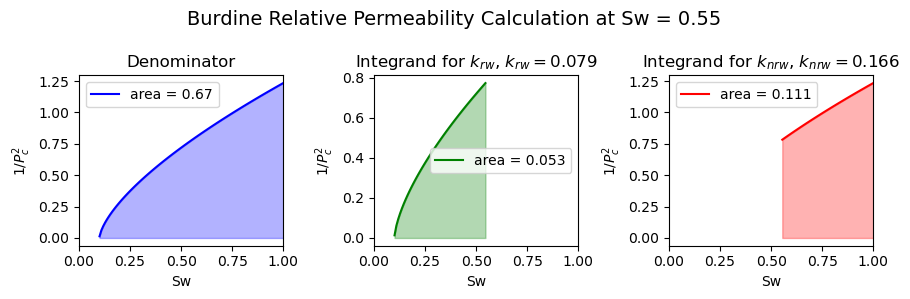

In [16]:
# Choose an index to visualize
i = 50
Sw_val = Sw[i]
# Normalized saturation
Se_val = (Sw_val - Swr)/((1 - Snwr) - Swr)

# Denominator is the same for both
denom = trapz(1 / Pc_bc**2, Sw)

# Compute numerators for krw and krnw
kw_numer = 1 / Pc_bc[:i]**2
knw_numer = 1 / Pc_bc[i:]**2

krw_integrand = Se_val**2 * trapz(kw_numer, Sw[:i])
krw_val = krw_integrand / denom

knrw_integrand = (1 - Se_val)**2 * trapz(knw_numer, Sw[i:])
knrw_val = knrw_integrand / denom

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(9, 3))
fig.suptitle(f"Burdine Relative Permeability Calculation at Sw = {Sw_val:.2f}", fontsize=14)

# 1. krw Integrand
axs[0].plot(Sw, 1 / Pc_bc**2, label=f'area = {denom:.2f}', color='blue')
axs[0].fill_between(Sw, 1 / Pc_bc**2, color='blue', alpha=0.3)
axs[0].set_title("Denominator")
axs[0].set_xlabel("Sw")
axs[0].set_ylabel(r'$1/P_c^2$')
axs[0].set_xlim([0,1])
axs[0].legend()

# 2. krw Integrand
axs[1].plot(Sw[:i], kw_numer, label=f'area = {krw_integrand:.3f}', color='green')
axs[1].fill_between(Sw[:i], kw_numer, color='green', alpha=0.3)
axs[1].set_title(f"Integrand for $k_{{rw}}$, $k_{{rw}} = {krw_val:.3f}$")
axs[1].set_xlabel("Sw")
axs[1].set_ylabel(r'$1/P_c^2$')
axs[1].set_xlim([0,1])
axs[1].legend()

# 3. krnw Integrand
axs[2].plot(Sw[i:], knw_numer, label=f'area = {knrw_integrand:.3f}', color='red')
axs[2].fill_between(Sw[i:], knw_numer, color='red', alpha=0.3)
axs[2].set_title(f"Integrand for $k_{{nrw}}$, $k_{{nrw}} = {knrw_val:.3f}$")
axs[2].set_xlabel("Sw")
axs[2].set_ylabel(r'$1/P_c^2$')
axs[2].set_xlim([0,1])
axs[2].legend()

plt.tight_layout()
plt.show()

In [17]:
# Burdine function
def burdine_fun(Sw, Swr, Snwr, Pc):
    # Normalized saturation
    Se = (Sw - Swr)/((1 - Snwr) - Swr)
    # both of the relative permeability integrals have the same fixed denominator
    denom = trapz(1/Pc**2, Sw)
    # preallocate the array for saving the values
    krw_burdine = np.zeros(np.shape(Sw))
    krnw_burdine = np.zeros(np.shape(Sw))
    
    # integrate from Swr to Sw
    for i in range(len(Sw)-1,0,-1):
        kw_numer = 1/Pc[:i]**2
        krw_burdine[i] = Se[i]**2*trapz(kw_numer, Sw[:i])/denom
    
    # integrate from Sw to 1    
    for i in range(len(Sw)):
        knw_numer = 1/Pc[i:]**2
        krnw_burdine[i] = (1-Se[i])**2*trapz(knw_numer, Sw[i:])/denom
    
        ## Add plot showing areas for visualization/
    return krw_burdine, krnw_burdine

C:\Users\venka\AppData\Local\Temp\ipykernel_17424\1243424092.py:6: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  denom = trapz(1/Pc**2, Sw)
C:\Users\venka\AppData\Local\Temp\ipykernel_17424\1243424092.py:14: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  krw_burdine[i] = Se[i]**2*trapz(kw_numer, Sw[:i])/denom
C:\Users\venka\AppData\Local\Temp\ipykernel_17424\1243424092.py:19: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  krnw_burdine[i] = (1-Se[i])**2*trapz(knw_numer, Sw[i:])/denom


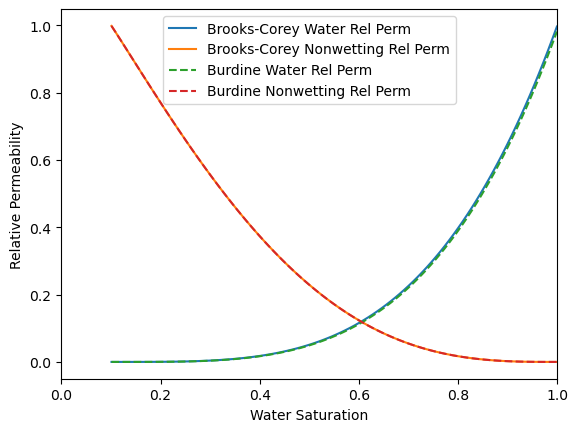

In [18]:
# Calculate brooks-corey rel perm
krw_bc, krnw_bc = brooks_corey_rel_perm_fun(Sw, Swr, Snwr, krw0, krnw0, m_bc)

# Calculate rel perm from brooks-corey capillary pressure curve
krw_burdine, krnw_burdine = burdine_fun(Sw, Swr, Snwr, Pc_bc)

plt.plot(Sw, krw_bc, label='Brooks-Corey Water Rel Perm')
plt.plot(Sw, krnw_bc, label='Brooks-Corey Nonwetting Rel Perm')

plt.plot(Sw, krw_burdine, '--', label='Burdine Water Rel Perm')
plt.plot(Sw, krnw_burdine, '--', label='Burdine Nonwetting Rel Perm')

plt.xlabel('Water Saturation')
plt.ylabel('Relative Permeability')
plt.legend()
plt.xlim(0, 1)
plt.show()
